# (5주차) 4월4일

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈
- categories: [Bigdata]

---

### imports 

In [1]:
#!conda install -c conda-forge python-graphviz -y

In [4]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
import tensorflow.experimental.numpy as tnp 

In [5]:
tnp.experimental_enable_numpy_behavior() 

---

### 최적화의 문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$ 

`-` 기존에 했던 방법은 수식을 알고 있어야 한다는 단점이 있음 

`-` optimizer를 만들어 최적값을 찾아주는 방법을 생각하게 됨! $\to$ 수식을 몰라도 된다~!

---

### tf.keras.optimizers를 이용한 최적화방법 

#### 방법1: opt.apply_gradients()를 이용 

`-` 저번 주 복습

In [9]:
beta = np.linspace(-10,10,100)
loss = (beta/2-1)**2

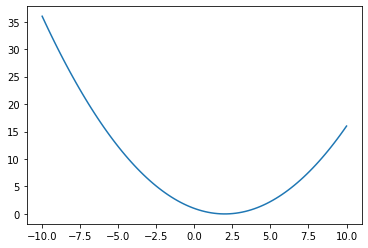

In [10]:
plt.plot(beta,loss)

In [12]:
alpha = 0.01/6

In [13]:
beta=tf.Variable(-10.0)

In [17]:
opt = tf.keras.optimizers.SGD(alpha)

In [15]:
with tf.GradientTape() as tape : 
    tape.watch(beta)
    loss=(beta/2-1)**2
slope = tape.gradient(loss,beta) #6이라는 값을 slope로 지정

`-` for문으로 정리

In [37]:
alpha = 0.01/6
beta=tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)

In [29]:
for epoc in range(10000) : 
    with tf.GradientTape() as tape : 
        tape.watch(beta)
        loss=(beta/2-1)**2
    slope = tape.gradient(loss,beta) #6이라는 값을 slope로 지정
    opt.apply_gradients([(slope,beta)])
    beta                        

In [30]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9987504>

`-` iter1

In [16]:
beta.assign_sub(slope*alpha)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2

- iter1은 수식 필요, iter2에서는 옵티마이저 사용
- 🥸**opt.apply_gradients()의 입력은 pair의 list**🥸

In [23]:
with tf.GradientTape() as tape : 
    tape.watch(beta)
    loss=(beta/2-1)**2
slope = tape.gradient(loss,beta) #6이라는 값을 slope로 지정

In [25]:
opt.apply_gradients([(slope,beta)])  #beta.assign_sub(slope*alpha)와 같은 역할을 해준다.
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.950048>

In [19]:
#opt.apply_gradients?
#변수에 gradient를 적용해서 더 좋은 값을 찾아주는...

`-` tip

In [32]:
opt.learning_rate  #alpha 값임

<tf.Variable 'SGD/learning_rate:0' shape=() dtype=float32, numpy=0.0016666667>

In [34]:
opt.lr  #alpha값임

<tf.Variable 'SGD/learning_rate:0' shape=() dtype=float32, numpy=0.0016666667>

- 둘의 차이를 보기 위해 주소를 찍어보자.  $\to$  주소가 같으니 똑같은 애들임

In [35]:
id(opt.learning_rate)

140580737133312

In [36]:
id(opt.lr)

140580737133312

---

#### 방법2: opt.minimize()

> 왜 이용해야 하는가? gradient.tape를 안 써도 된다!

In [38]:
alpha = 0.01/6
beta=tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)

In [38]:
alpha = 0.01/6
beta=tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)

In [42]:
#쓰기 위해서는 loss function 정의가 필요함
loss_fn = lambda: (beta/2-1)**2

- `lambda x: x**2` <=> `lambda(x)=x^2`
- `lambda x,y: x+y` <=> `lambda(x,y)=x+y`
- `lambda: y` <=> `lambda()=y`, 입력이 없으면 출력은 항상 y인 함수 

In [46]:
loss_fn()  #입력은 없고 출력은 뭔가 계산되는 함수

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

`-` iter1

In [47]:
opt.minimize(loss_fn, beta)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [48]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2

In [49]:
opt.minimize(loss_fn, beta)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=2>

In [50]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

`-` for문으로 정리하면

In [51]:
alpha = 0.01/6
beta=tf.Variable(-10.0)
opt = tf.keras.optimizers.SGD(alpha)
loss_fn = lambda: (beta/2-1)**2
for epoc in range(10000) :
    opt.minimize(loss_fn, beta)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

---

### 회귀분석 문제

> 결국 이걸 풀기 위한 것임!

`-` ${\bf y} \approx 2.5 + 4 {\bf x}$

In [52]:
tnp.random.seed(43052)
N = 200
x = tnp.linspace(0,1,N) 
epsilon = tnp.random.randn(N)*0.5
y = 2.5+4*x + epsilon
y_true = 2.5+4*x

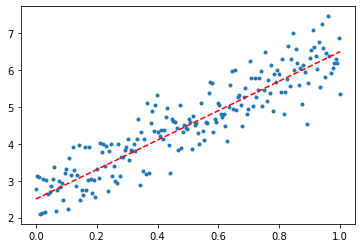

In [53]:
plt.plot(x,y,'.')
plt.plot(x,y_true,'r--')

### 이론적 풀이

#### 풀이1: 스칼라버전

`-` 포인트(알아둬야 할 공식🥸)  
- $S_{xx}=$, $S_{xy}=$
- $\hat{\beta}_0=$, $\hat{\beta}_1=$

In [55]:
Sxx=sum((x-x.mean())**2)
Sxy=sum((x-x.mean())*(y-y.mean()))

In [59]:
beta1_hat = Sxy/Sxx
beta1_hat

<tf.Tensor: shape=(), dtype=float64, numpy=3.933034516733168>

In [60]:
beta0_hat = y.mean() - beta1_hat *x.mean()
beta0_hat

<tf.Tensor: shape=(), dtype=float64, numpy=2.583667211565867>

#### 풀이2: 벡터버전

`-` 포인트
- $\hat{\beta}=(X'X)^{-1}X'y$

In [63]:
y = y.reshape(N,1)
X = tf.stack([tf.ones(N,dtype='float64'),x],axis=1)

In [64]:
y.shape, X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [73]:
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

#### 풀이3: 벡터버전, 손실함수의 도함수이용 

`-` 포인트
- $loss'(\beta)=-2X'y +2X'X\beta$
- $\beta_{new} = \beta_{old} - \alpha \times loss'(\beta_{old})$

In [75]:
y = y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [76]:
beta_hat = tnp.array([-5,10]).reshape(2,1)
beta_hat

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[-5],
       [10]])>

In [77]:
slope = -2*X.T @ y + 2*X.T@ X @ beta_hat 
slope

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-1820.07378797],
       [ -705.77222696]])>

In [83]:
#loss를 다르게
slope = (-2*X.T @ y + 2*X.T@ X @ beta_hat)/N #MSE
slope

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-1.14482646e-12],
       [ 2.13617568e-12]])>

In [84]:
alpha = 0.001

In [85]:
step = slope*alpha
step

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-1.14482646e-15],
       [ 2.13617568e-15]])>

In [87]:
for epoc in range(1000):
    slope = (-2*X.T @ y + 2*X.T@ X @ beta_hat)/N
    beta_hat = beta_hat - alpha * slope

In [88]:
beta_hat

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

- MSE의 장점 : 평균을 내면 sample size가 커져도 alpha값을 일정 범위 내에서 조정할 수 있어서 편하다

### GradientTape를 이용 

#### 풀이1: 벡터버전

`-` 포인트
```python
## 포인트코드1: 그레디언트 테입  
with tf.GradientTape() as tape: 
    loss = 
## 포인트코드2: 미분 
slope = tape.gradient(loss,beta_hat) 
## 포인트코드3: update 
beta_hat.assign_sub(slope*alph) 
```

In [125]:
y=y.reshape(N,1)

In [126]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [127]:
for epoc in range(1000) : 
    with tf.GradientTape() as tape: 
        yhat = X@beta_hat
        loss = (y-yhat).T @ (y-yhat) / N 
    slope = tape.gradient(loss,beta_hat) 
    beta_hat.assign_sub(slope * alpha) 

In [128]:
beta_hat  

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전

`-` 포인트
```python
## 포인트코드: 미분
slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
```

In [120]:
y = y.reshape(-1)
x.shape, y.shape

(TensorShape([200]), TensorShape([200]))

In [121]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [122]:
alpha=0.1

In [123]:
for epoc in range(1000):   
    with tf.GradientTape() as tape: 
        yhat = beta0_hat + beta1_hat*x 
        loss = tf.reduce_sum((y-yhat)**2)/N #sum((y-yhat)**2) / N 
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat]) 
    beta0_hat.assign_sub(slope0 * alpha) 
    beta1_hat.assign_sub(slope1 * alpha) 

In [124]:
beta0_hat, beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

- 시간이 너무 오래 걸림 -> tf.reduce_sum 을 하면 더 빠르다
- 벡터 버젼으로 하는게 더 빠르게 !

### GradientTape + opt.apply_gradients

#### 풀이1: 벡터버전 

`-` 포인트 
```python
## 포인트코드: 업데이트
opt.apply_gradients([(slope,beta_hat)])  ## pair의 list가 입력 
```

In [129]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [130]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [131]:
alpha=0.1

`-` 사전학습

In [132]:
tf.optimizers

<module 'keras.api._v2.keras.optimizers' from '/home/khy/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py'>

In [133]:
tf.keras.optimizers

<module 'keras.api._v2.keras.optimizers' from '/home/khy/anaconda3/envs/py310/lib/python3.10/site-packages/keras/api/_v2/keras/optimizers/__init__.py'>

- 저장공간이 같음 $\to$ 똑같은 함수~

In [134]:
opt = tf.optimizers.SGD(alpha)

In [135]:
for epoc in range(1000): 
    with tf.GradientTape() as tape: 
        yhat = X@beta_hat
        loss = (y-yhat).T @ (y-yhat) / N 
    slope = tape.gradient(loss,beta_hat)  
    opt.apply_gradients( [(slope,beta_hat)] )

In [136]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전 

`-` 포인트
```python
## 포인트코드: 업데이트 
opt.apply_gradients([(slope0,beta0_hat),(slope1,beta1_hat)]) ## pair의 list가 입력 
```

In [137]:
y=y.reshape(-1)

In [138]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [139]:
alpha=0.1
opt=tf.optimizers.SGD(alpha)

In [140]:
for epoc in range(1000): 
    with tf.GradientTape() as tape: 
        yhat = beta0_hat + beta1_hat*x
        loss = tf.reduce_sum((y-yhat)**2) / N 
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])  
    opt.apply_gradients( [(slope0,beta0_hat),(slope1,beta1_hat)] )

In [141]:
beta0_hat,beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

### opt.minimize

#### 풀이1: 벡터버전, 사용자정의 손실함수 with lambda

In [142]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [143]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [144]:
loss_fn = lambda: (y-X@beta_hat).T @ (y-X@beta_hat)/N

In [145]:
alpha=0.1

In [146]:
opt = tf.optimizers.SGD(alpha) 

In [147]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat) # 미분 + update 

In [148]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전, 사용자정의 손실함수 with lambda

`-` 포인트
```python
## 포인트코드: 미분 & 업데이트 = minimize 
opt.minimize(loss_fn,[beta0_hat,beta1_hat])
```

In [149]:
y=y.reshape(-1)
x.shape,y.shape

(TensorShape([200]), TensorShape([200]))

In [150]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0) 

In [151]:
alpha=0.1

In [153]:
opt = tf.optimizers.SGD(alpha) 

In [152]:
loss_fn = lambda: tf.reduce_sum((y-beta0_hat - beta1_hat*x)**2)/N

In [154]:
for epoc in range(1000):
    opt.minimize(loss_fn,[beta0_hat,beta1_hat]) # 미분 + update 

In [155]:
beta0_hat, beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

#### 풀이3: 벡터버전, 사용자정의 (짧은) 손실함수 

`-` 포인트
```python
## 포인트코드: 손실함수정의 
def loss_fn():
    return ??
```

In [156]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [157]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [158]:
alpha=0.1
opt = tf.optimizers.SGD(alpha) 

In [159]:
def loss_fn():
     return (y-X@beta_hat).T @ (y-X@beta_hat)/N

In [161]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat) # 미분 + update 

In [162]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

#### 풀이4: 벡터버전, 사용자정의 (긴) 손실함수 

`-` 포인트
```python
## 포인트코드: 손실함수정의 
def loss_fn():
    ??
    ??
    return ??
```

In [163]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [164]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [165]:
alpha=0.1
opt = tf.optimizers.SGD(alpha) 

In [168]:
def loss_fn():
    yhat = X@beta_hat #컴퓨터한테 전달한 수식1
    loss = (y-yhat).T @ (y-yhat) / N  #컴퓨터한테 전달한 수식2
    return loss  #tape.gradient(loss,beta_hat)에서의 미분당하는 애

In [169]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat) # 미분 + update 

In [170]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이5: 벡터버전, 사용자정의 손실함수 <- tf.losses.MSE 

`-` 포인트
```python
## 포인트코드: 미리구현되어있는 손실함수 이용 
tf.losses.MSE(y,yhat)
```

In [171]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [172]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [173]:
alpha=0.1
opt = tf.optimizers.SGD(alpha) 

In [174]:
def loss_fn():
    yhat= X@beta_hat
    loss = tf.losses.MSE(y.reshape(-1),yhat.reshape(-1))
    return loss

> tf.losses.MSE 는 벡터도 받을 수 있는데, 우리가 생각하는 loss가 나올려면 길이가 n인 벡터를 넣어줘야 한다. 그래서 위에서 reshape을 해주는 것임. 그리고 N으로 나눠주지 않게 조심하기!

In [175]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat) # 미분 + update 

In [176]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이6: 벡터버전, 사용자정의 손실함수 <- tf.losses.MeaSquaredError

`-` 포인트
```python
## 포인트코드: 클래스로부터 손실함수 오브젝트 생성 (함수를 찍어내는 클래스) 
mse_fn = tf.losses.MeanSquaredError()
mse_fn(y,yhat)
```

In [186]:
y=y.reshape(N,1)
X.shape,y.shape

(TensorShape([200, 2]), TensorShape([200, 1]))

In [187]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [188]:
alpha=0.1
opt = tf.optimizers.SGD(alpha) 

In [189]:
mseloss_fn=tf.losses.MeanSquaredError()

In [190]:
#dir(mseloss_fn)해서 call이 있으면 함수처럼 쓸 수 있다는 것을 알아두자~

- mseloss_fn = tf.keras.losses.MSE 라고 보면 된다

In [191]:
mseloss_fn(y.reshape(-1),yhat.reshape(-1))

<tf.Tensor: shape=(), dtype=float64, numpy=0.25493940711021423>

In [192]:
def loss_fn():
    yhat= X@beta_hat
    loss = mseloss_fn(y.reshape(-1),yhat.reshape(-1))
    return loss

In [193]:
for epoc in range(1000):
    opt.minimize(loss_fn,beta_hat) # 미분 + update 

In [194]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

---

**🥸케라스로 회귀분석 풀기🥸**

### tf.keras.Sequential

`-` $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i$ 의 서로다른 표현 

In [195]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

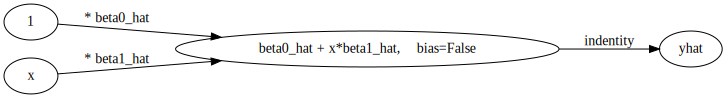

In [200]:
gv(''' 
    "1" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta0_hat"]
    "x" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta1_hat"]
    "beta0_hat + x*beta1_hat,    bias=False" -> "yhat"[label="indentity"]
    ''')

> indentity : 항등식  
> 입력 -> layer -> 출력 구조

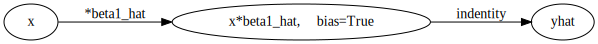

In [197]:
gv('''
"x" -> "x*beta1_hat,    bias=True"[label="*beta1_hat"] ;
"x*beta1_hat,    bias=True" -> "yhat"[label="indentity"] ''')


> bias=True는 +beta0_hat과 같은 상수term을 생략했다는 의미

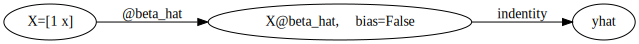

In [198]:
gv('''
"X=[1 x]" -> "X@beta_hat,    bias=False"[label="@beta_hat"] ;
"X@beta_hat,    bias=False" -> "yhat"[label="indentity"] ''')


> 벡터 버전으로 하면 위와 같다

#### 풀이1: 벡터버전, 사용자정의 손실함수 

`-` 포인트
```python
## 포인트코드1: 네트워크 생성 
net = tf.keras.Sequential()

## 포인트코드2: 네트워크의 아키텍처 설계 
net.add(tf.keras.layers.Dense(1,input_shape=(2,),use_bias=False)) 

## 포인트코드3: 네트워크 컴파일 = 아키텍처 + 손실함수 + 옵티마이저
net.compile(opt,loss=loss_fn2)

## 포인트코드4: 미분 & update 
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) 
```

`-` 레이어 : 입력 -> 레이어 -> 출력 / 입력 -> 레이어1 -> 출력/입력 -> 레이어2 -> 출력 : 입력이 들어가는 어떠한 층

`-` 네트워크 : 레이어들의 집합

In [229]:
net = tf.keras.Sequential()

In [230]:
net.add(tf.keras.layers.Dense(units=1, input_shape=(2,), use_bias=False))  #네트워크에 레이어 추가, yhat을 구하는 방법 정의 = 아키텍쳐가 설계

- units는 layer의 출력의 차원, 이 경우는 yhat의 차원, yhat은 (200,1)이므로 1임.
- input_shape는 layer의 입력 차원, 이 경우는 X, X는 (200,2)이므로 2임.
- observation 수는 무시!!

In [231]:
net.summary()  #뭔가 만들어졌다!

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [249]:
def loss_fn2(y,yhat):
    return (y-yhat).T @ (y-yhat) / N

In [250]:
alpha = 0.1
opt = tf.optimizers.SGD(alpha)

In [251]:
#초기값 설정하기
_w = net.get_weights()

In [252]:
type(_w)  #array가 들어가 있는 리스트

list

In [253]:
type(_w[0])

numpy.ndarray

In [254]:
_w

[array([[2.58366 ],
        [3.933048]], dtype=float32)]

In [255]:
[np.array([[-5.0],[10.0]],dtype=np.float32)]

[array([[-5.],
        [10.]], dtype=float32)]

In [256]:
net.set_weights([np.array([[-5.0],[10.0]],dtype=np.float32)])

In [245]:
# 아키텍처 + 손실함수 + 옵티마이저 => 네트워크에 다 합치자 => 네트워크를 컴파일한다.
net.compile(opt,loss_fn2)

In [260]:
# 아키텍처 + 손실함수 + 옵티마이저 => 네트워크에 다 합치자 => 네트워크를 컴파일한다.
net.compile(opt,loss=tf.losses.MSE)  #loss도 그냥 있는 거 쓰자

In [258]:
# 미분 + 파라미터 업데이트 = net.fit
net.fit(X, y, epochs=1000, batch_size=N,verbose=0)

In [259]:
net.weights

[<tf.Variable 'dense_6/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.58366 ],
        [3.933048]], dtype=float32)>]